In [1]:
#Importing all Imp libraries

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile


from collections import defaultdict
from io import StringIO
import matplotlib.pyplot as plt
from PIL import Image

from utils import label_map_util
from utils import visualization_utils as vis_util

In [2]:
%matplotlib inline
sys.path.append("..")

In [3]:
#Set/load/access tensorflow environment
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [4]:
#Preparation for downloading

#Pre-trained COCO model
MODEL_NAME='ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE= MODEL_NAME+'.tar.gz'
DOWNLOAD_BASE= 'http://download.tensorflow.org/models/object_detection/'
#Where to store it
PATH_TO_CKPT=  MODEL_NAME+ './frozen_inference_graph.pb'
#Label the path
PATH_TO_LABELS=os.path.join('data','mscoco_label_map.txt')
#Definind the number of classes 
NUM_CLASSES=90

In [5]:
#Checking if its already downloaded and if not, then download it
if not os.path.exists(PATH_TO_CKPT):
    print('Downloading COCO Model...')
    opener=urllib.request.URLopener()
    opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
    tar_file=tarfile.open(MODEL_FILE)
    for file in tar_file.getmembers():
        file_name=os.path.basename(file.name)
        if 'frozen_inference_graph.pb' in file_name:
            tar_file.extract(file,os.getcwd())
    print('COCO Model downloaded succesfully')
    
    
#If COCO Model has already been downloaded
else:
    print('COCO Model Already Exists')
    

COCO Model Already Exists


In [6]:
#Loading the variables of frozen_inference_graph to use
detection_graph=tf.Graph()
with detection_graph.as_default():
    od_graph_def=tf.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT,'rb') as fid:
        serialized_graph= fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def,name='')

In [7]:
#Loading Label Map
label_map = label_map_util.load_labelmap(os.path.join('F:\Beyond Vision\object_recognition_detection\data', 'mscoco_label_map.pbtxt'))

categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)



W1107 18:25:54.009066  7456 deprecation_wrapper.py:119] From F:\Beyond Vision\object_recognition_detection\utils\label_map_util.py:116: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [8]:
#Converting images to numpy array
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height,im_width,3)).astype(np.uint8)

In [28]:
#To load the images for object detection
PATH_TO_TEST_IMAGES_DIR='F:/Beyond Vision/object_recognition_detection/test_images/'
TEST_IMAGE_PATH=[os.path.join(PATH_TO_TEST_IMAGES_DIR ,'image{}.jpg'.format(i)) for i in range(9,10)]
#Defining size of output image
IMAGE_SIZE= (12,8)

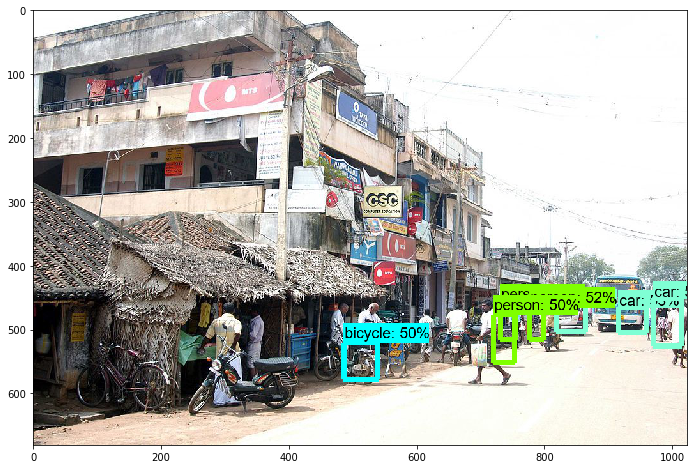

car
person
car
person
car
person
bicycle


In [29]:
# All variables for object detection and object detection operation
mainstr=[]
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATH:
            image=Image.open(image_path)
            image_np= load_image_into_numpy_array(image)
            image_np_expanded=np.expand_dims(image_np, axis=0)
            image_tensor= detection_graph.get_tensor_by_name('image_tensor:0') # Image
            boxes= detection_graph.get_tensor_by_name('detection_boxes:0')
            scores= detection_graph.get_tensor_by_name('detection_scores:0') #Match %
            classes= detection_graph.get_tensor_by_name('detection_classes:0') #Name of object
            num_detections= detection_graph.get_tensor_by_name('num_detections:0') #number of objects detected
            
            (boxes,scores,classes,num_detections)= sess.run([boxes,scores,classes,num_detections],
                                                            feed_dict={image_tensor: image_np_expanded})
            
            #Visualization
            vis_util.visualize_boxes_and_labels_on_image_array(image_np,np.squeeze(boxes),
                                                               np.squeeze(classes).astype(np.int32),
                                                               np.squeeze(scores),
                                                               category_index,
                                                               use_normalized_coordinates=True,
                                                               line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            
            
            
            final_score = np.squeeze(scores)    
            count = 0
            for i in range(100):
                if scores is None or final_score[i] > 0.5:
                    count = count + 1
            #print('cpunt',count)
            printcount =0;
            for i in classes[0]:
              printcount = printcount +1
              print(category_index[i]['name'])
              mainstr.append(category_index[i]['name'])
              
              if(printcount == count):
                    break

In [30]:
import pyttsx3
engine=pyttsx3.init()

In [31]:
if len(mainstr)<1:
    engine.say("Sorry No Object Was Detected!")
    engine.runAndWait()
elif len(mainstr)==1:
    engine.say("In front of you is a {}".format(mainstr))
    engine.runAndWait()
else:
    from collections import Counter
    x=Counter(mainstr)
    engine.say("In front of you are")
    engine.runAndWait()
    for i in x:
        if x[i]>1:
            object=i+"s"
        else:
            object=i
        engine.say("{} {}".format(x[i],object))
        engine.runAndWait()